<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
breast = pd.read_csv('breast-cancer-wisconsin-data.csv')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
# Head
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
breast.shape

(569, 33)

In [5]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
breast.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
breast.drop('Unnamed: 32', axis=1, inplace=True)
breast.set_index('id',inplace=True)

In [ ]:
breast.describe().T

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [9]:
target_column = 'diagnosis'

y = breast[target_column]

### 4. What is the baseline accuracy?

In [10]:
y.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [11]:
def forward_selection(model, X_train, X_test, y_train, y_test, show_steps = False):
    ## Use Forward Feature Selection to pick a good model

    # start with no predictors
    included = []
    # keep track of model and parameters
    best = {'feature': '', 'accuracy': 0}
    # create a model object to hold the modelling parameters
    # create a model for Linear Regression
    # get the number of cases in the test data
    n = X_test.shape[0]

    while True:
        changed = False

        if show_steps:
            print('') 

        # list the features to be evaluated
        excluded = list(set(X.columns) - set(included))

        if show_steps:
            print('(Step) Excluded = %s' % ', '.join(excluded))  

        # for each remaining feature to be evaluated
        for new_column in excluded:

            if show_steps:
                print('(Step) Trying %s...' % new_column)
                print('(Step) - Features = %s' % ', '.join(included + [new_column]))

            # fit the model with the Training data
            fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
            # calculate the score (R^2 for Regression)
            accuracy = model.score(X_train[included + [new_column]], y_train) # calculate the score

            if show_steps:
                print('(Step) - Accuracy: This = %.3f; Best = %.3f' % 
                      (accuracy, best['accuracy']))

            # if model improves
            if accuracy > best['accuracy']:
                # record new parameters
                best = {'feature': new_column, 'accuracy': accuracy}
                # flag that found a better model
                changed = True
                if show_steps:
                    print('(Step) - New Best!   : Feature = %s; Accuracy = %.3f' % 
                          (best['feature'], best['accuracy']))
        # END for

        # if found a better model after testing all remaining features
        if changed:
            # update control details
            included.append(best['feature'])
            excluded = list(set(excluded) - set(best['feature']))
            print('Added feature %-4s with Accuracy = %.3f' % 
                  (best['feature'], best['accuracy']))
        else:
            # terminate if no better model
            break

    print('')
    print('Resulting features:')
    print(', '.join(included))

In [12]:
feature_columns = [c for c in breast.columns if c != 'diagnosis']
X = breast[feature_columns]

In [13]:
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y)
forward_selection(knn, X_train, X_test, y_train, y_test, False)

Added feature radius_worst with Accuracy = 0.930
Added feature compactness_worst with Accuracy = 0.953
Added feature texture_se with Accuracy = 0.958

Resulting features:
radius_worst, compactness_worst, texture_se


In [14]:
X = breast[['perimeter_worst', 'texture_worst', 'radius_mean']]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [16]:
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred_class = knn.predict(X)

# compute classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [17]:
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# STEP 2: train the model on the training set (using K=1)
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

1.0


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [18]:
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn3 = KNeighborsClassifier(n_neighbors = X_train.shape[0])

# Fit Train Data
knn3.fit(X_train,y_train)

# Print accuracy_score
accuracy_score = knn3.score(X_test,y_test)
print(accuracy_score)

0.6228070175438597


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [19]:
# plot test accuracy by number of neighbors:
test_acc = []
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

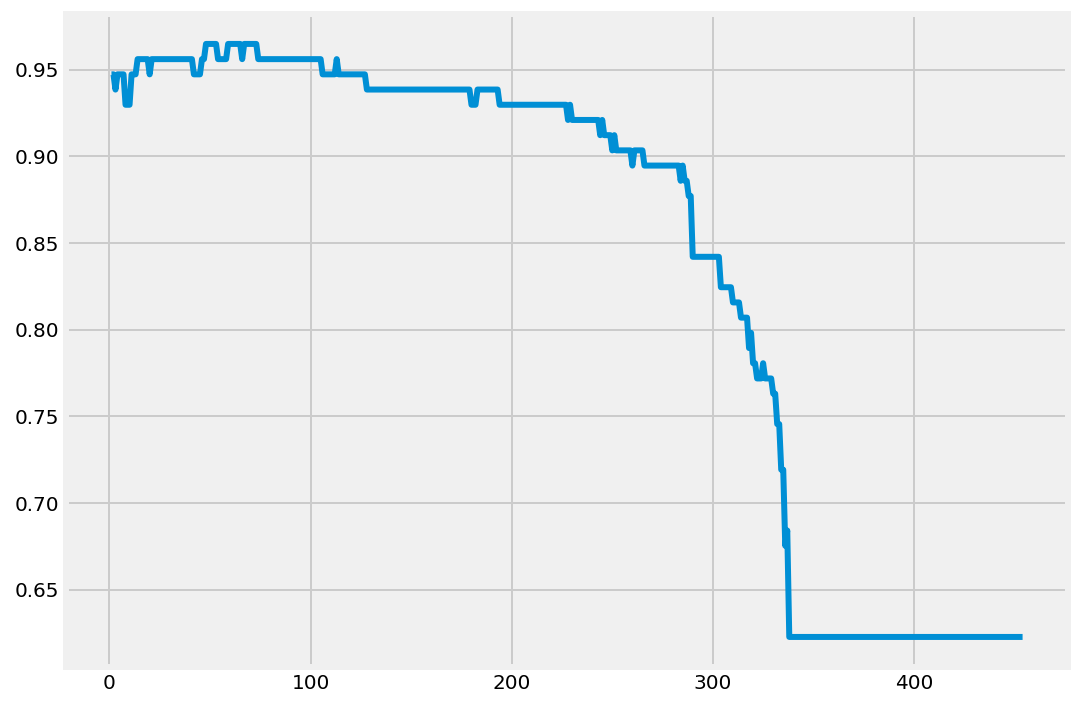

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
folds = 5

# plot test accuracy by number of neighbors:
test_acc_cv = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_cv.append(np.mean(cross_val_score(knn, X, y, cv=5)))
    
print(max(test_acc))

0.9649122807017544


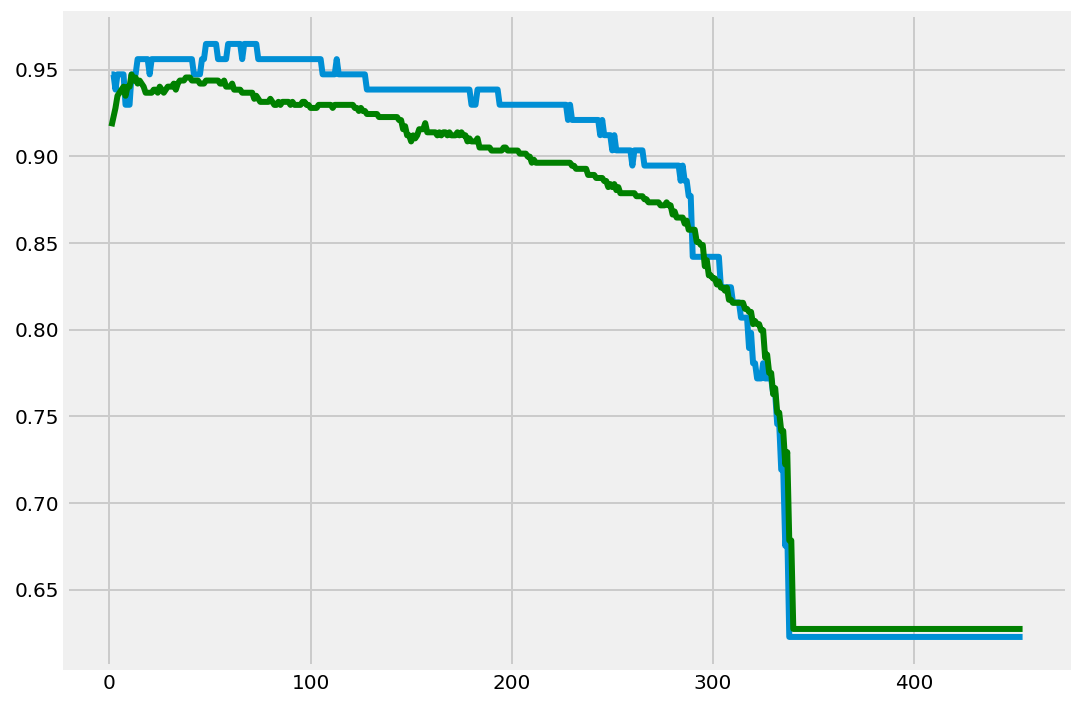

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_cv, lw=3., color='green')
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [24]:
# standardise X
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_std

array([[ 2.30360062, -1.35929347,  1.09706398],
       [ 1.53512599, -0.36920322,  1.82982061],
       [ 1.34747521, -0.02397438,  1.57988811],
       ...,
       [ 0.57900058,  1.37485378,  0.70228425],
       [ 2.30360062,  2.23792588,  1.83834103],
       [-1.43273495,  0.76418957, -1.80840125]])

In [25]:
# plot test accuracy by number of neighbors:
test_acc_std = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, X_std, y, cv=5)))

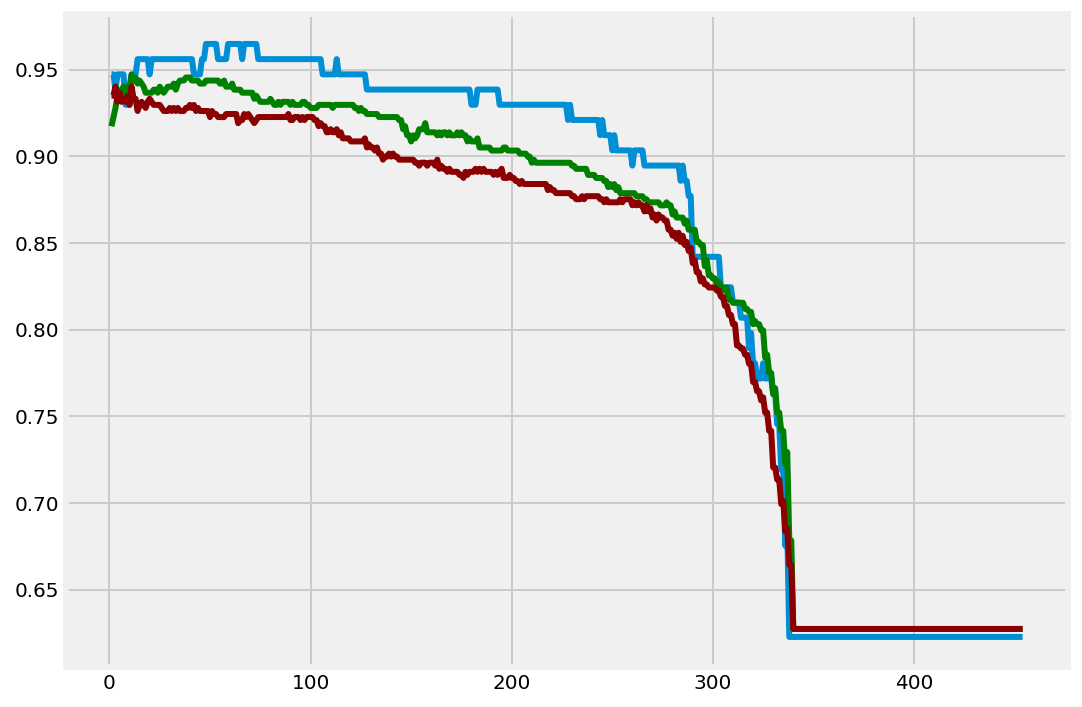

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_cv, lw=3., color='green')
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color='darkred')
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



